In [121]:
import pandas as pd
import re

### Scraping Reddit

In [122]:
subs = ["worldpolitics", "anime_titties"]
maxs = 1000 # I LITERALLY TRIED FOR HOURS TO HAVE THIS NOT HARD CODED DEAR GOD PLEASE HELP ME #TODO

In [123]:
%run scripts/Submissions_edit.py
%run scripts/Comments_edit.py

#submissioninit(subs)
#commentsinit(subs)

In [124]:
def CSVtoDF(subreddit, contenttype):
    submissions = pd.read_csv("csvs/" + subreddit + "-submissions.csv") 
    comments = pd.read_csv("csvs/" + subreddit + "-comments.csv")
    if contenttype == 'comments':
        return comments
    if contenttype == 'submissions':
        return submissions

In [125]:
worldpolitics_submissions = CSVtoDF('worldpolitics', 'submissions')
worldpolitics_comments = CSVtoDF('worldpolitics', 'comments')
anime_titties_submissions = CSVtoDF('anime_titties', 'submissions')
anime_titties_comments = CSVtoDF('anime_titties', 'comments')

In [126]:
print(worldpolitics_comments)

                 datetime              author  \
0     2020-06-25 19:49:07          I-Am-Skrit   
1     2020-06-25 19:44:49        Brave_Samuel   
2     2020-06-25 19:43:45         MaxImageBot   
3     2020-06-25 19:37:48       LordJohnStark   
4     2020-06-25 19:32:16            JeanStey   
...                   ...                 ...   
4995  2020-06-22 21:43:20       AutoModerator   
4996  2020-06-22 21:43:13          PrimalMusk   
4997  2020-06-22 21:41:49          korny_guys   
4998  2020-06-22 21:41:49  White_T_Poison_100   
4999  2020-06-22 21:41:44      Elgordofordo86   

                                                   body  
0     Bois we might have found it, a big tiddy goth ...  
1     This was way too long to read, so I didn’t. I ...  
2     69% larger (1080x784) version of linked image:...  
3     Yeah i was like,   wtf this has nothing to do ...  
4     Are you good? Or are you just naturally dense?...  
...                                                 ...  
4995 

### Analyzing reddit

In [127]:
%run code/AnalysisClasses.py

In [128]:
#sen = AnalysisClasses.VaderAnalyser(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='sentiment_author_trial', plotkind='bar')


#### Selecting a column + column value

In [139]:
%run code/AnalysisClasses.py

#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'])
#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'], textonly="yes")
multipleauthors = DataframeExtractor(dataframe=worldpolitics_comments, column='author', columnvalue=['AutoModerator', 'LordJohnStark', 'PrimalMusk'])
print(multipleauthors)

#wp_com_2020 = AnalysisClasses.DataframeExtractor(worldpolitics_comments, 'datetime') # TODO filter for time etc

                 datetime         author  \
3     2020-06-25 19:37:48  LordJohnStark   
30    2020-06-25 19:11:14  AutoModerator   
780   2020-06-25 07:23:04  AutoModerator   
782   2020-06-25 07:17:10  AutoModerator   
861   2020-06-25 06:05:41  AutoModerator   
2477  2020-06-24 12:18:19  AutoModerator   
3010  2020-06-24 04:47:58  AutoModerator   
3498  2020-06-23 21:53:09  AutoModerator   
3995  2020-06-23 16:09:59  AutoModerator   
4095  2020-06-23 14:08:02     PrimalMusk   
4766  2020-06-23 00:44:15  AutoModerator   
4995  2020-06-22 21:43:20  AutoModerator   
4996  2020-06-22 21:43:13     PrimalMusk   

                                                   body  
3     Yeah i was like,   wtf this has nothing to do ...  
30    We do not currently accept submissions from ne...  
780   We do not currently accept submissions from ne...  
782   We do not currently accept submissions from ne...  
861   We do not currently accept submissions from ne...  
2477  We do not currently accept su

#### Integrating that with Sentiment Analysis

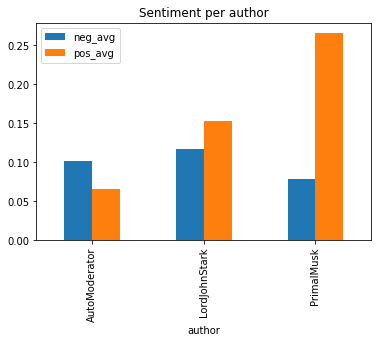

<Figure size 432x288 with 0 Axes>

In [148]:
#TODO DataframeExtractor in same class?
%run code/AnalysisClasses.py

#sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']))
sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='sentiment_author_trial', plotkind='bar')
#print(sen)

In [151]:
print(anime_titties_comments)

#TODO with regex?
animetittiesovertime = DataframeExtractor(dataframe=anime_titties_comments, column='datetime', columnvalue=['2020'])
print(animetittiesovertime)

                 datetime             author  \
0     2020-06-25 19:45:05  general_bonesteel   
1     2020-06-25 19:44:13    Colordripcandle   
2     2020-06-25 19:43:32    LonliestMonroni   
3     2020-06-25 19:37:08         Snoot_Boot   
4     2020-06-25 19:33:11          Toyotatea   
...                   ...                ...   
4995  2020-06-18 20:09:51          dogmodoga   
4996  2020-06-18 20:08:06      frostcanadian   
4997  2020-06-18 20:06:37           DCFY7439   
4998  2020-06-18 20:00:44          Henryman2   
4999  2020-06-18 20:00:39           DCFY7439   

                                                   body  
0               Thanks Jesus? Or Zeus just showing off?  
1     white is a race mot an ethnicity \n\nI'm not t...  
2     Fine, ethnically white. How are you going to m...  
3     Apparently the US is one of the worst places o...  
4     While there isn't any criminal offence, they d...  
...                                                 ...  
4995  They found 